## Hacker Statistics:

More oftent than not, we have sample measured data, for which we can easily get the numerical statistics, 
however, if we measure the data again for the same process under consideration, we mayn't get the same mean/median.
Hence, we need probability to come up with an interval rather than fixed statistics.

> to draw probailistic conclusions about what we might expect if we collected the same data again

> , OR the prcoess by which we go from measured data to probabiliistic conclusion


Instead of repeating the process of measuring data, Use simulations to compute probability

## Coin Flip:
    
#'np.random.random' = draws a number between 0 & 1 with equal probabiliity. if number < .5, then heads else tails

>Experiment which has two options True/False, called Bernaulli trial, and is best approximated by Binomial distribution

# Simulating 4 coin flips:

In [31]:
import numpy as np
np.random.seed(42)
random_numbers = np.random.random(size=4) # provide 4 random numbers b/w 0 and 1 with equal probability
random_numbers

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [36]:
heads = random_numbers <.5
np.sum(heads) # in numerical context, python treats 1 as True and 0 as False,  so you can sum it up.
#number of heads when flipped a coin 4 times

1

# What is the probability of getting 4 heads when tossing a coin 4 times. 

In [35]:

# simulate coin flip 1000's of times to approximate the probabiliity

#HHHH = (1/16)

all_heads =0
for _ in range(10000):
    heads = np.random.random(size=4) <.5
    n_heads =np.sum(heads)
    if n_heads ==4:
        all_heads = all_heads+1

all_heads/10000

0.062

# In essence,
Hacker statistics is about thinking:
   > How to simulate your data
   > simulate many many times


# The np.random module and Bernoulli trials
You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability `p` of landing heads (success) and probability `1−p` of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, `perform_bernoulli_trials(n, p)`, which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the `np.random.random()` function, which returns a random number between zero and one.

In [42]:
# since it is a biased coin, `p` can't be fixed and has to be parameterised. if np.random.random < p, then heads else tails

def perform_bernoulli_trials(n, p):
    n_successess = 0
    for i in range(n): # since we need to measure probability, we need to simulate the data (say 10000's) of times
        x= np.random.random()
        if x <p: # if x is less than p; p=.5 in case of unbiased coin, and p is not equal to .5, in case of biased coin
            n_successess = n_successess+1
    return n_successess #will give total flips, for probability divide this metric by n
        



In [46]:
perform_bernoulli_trials(100,.5)

46

## How many defaults might we expect?
Let's say a bank made `100` mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is `p = 0.05`. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the `perform_bernoulli_trials()` function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

> Please note over here, we're going from measured data to probabilistic conclusion. We know that out of 100 loans, 5 would default, but how would the overall probability distribution looks like so that area under the curve is 1

/Users/hjaggi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


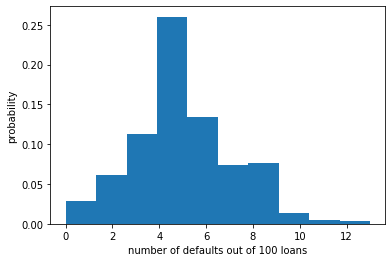

In [50]:
import matplotlib.pyplot as plt
n_defaults = np.empty(1000)
for i in range(1000):
    n_defaults[i]= perform_bernoulli_trials(100, .05)

_ = plt.hist(n_defaults, normed  =True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')
_ = plt.show()